# **Practical implementation of the Factor Analysis for dimensionality reduction in Python**
Factor Analysis (FA) is a powerful statistical method used for dimensionality reduction. It helps uncover latent variables, or "factors," that explain the correlations among observed variables. In this exercise, I'll walk through a practical implementation of Factor Analysis using Python, leveraging libraries such as scikit-learn and pandas, and apply it to a real-world dataset to demonstrate how it can simplify complex data while preserving meaningful structure.

Sources:<br>
[A simple example of Factor Analysis in Python (Freie Universität, Berlin)](https://www.geo.fu-berlin.de/en/v/soga-py/Advanced-statistics/Multivariate-Approaches/Factor-Analysis/A-Simple-Example-of-Factor-Analysis-in-Python/index.html)

In [35]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import FactorAnalysis # Factor Analysis sklearn's class
from sklearn.preprocessing import StandardScaler # We will need to standarize quantitative variables

In [36]:
food = pd.read_csv("https://userpage.fu-berlin.de/soga/300/30100_data_sets/food-texture.csv", index_col=0)
food.head()

# Dataset source:
# https://openmv.net/info/food-texture

,Oil,Density,Crispy,Fracture,Hardness
B110,16.5,2955,10,23,97
B136,17.7,2660,14,9,139
B171,16.2,2870,12,17,143
B192,16.7,2920,10,31,95
B225,16.3,2975,11,26,143


One tricky parameter of the FactorAnalysis class is getting right the number of components (factors)

```Python
FactorAnalysis(n_components = <factors>)
```

You can either make an educated guess if you know the data well, or you can just peform a [principal component analysis (PCA)](https://github.com/jrbayguade/DataTreatment_DimensionalityReduction_PCA/blob/PCA_Class/T7_1_PCA_Principal_Component_Analysis.ipynb) first and get a good estimate of the number of factors.

In this example we set the number of factors to be ```Python factors = 2```

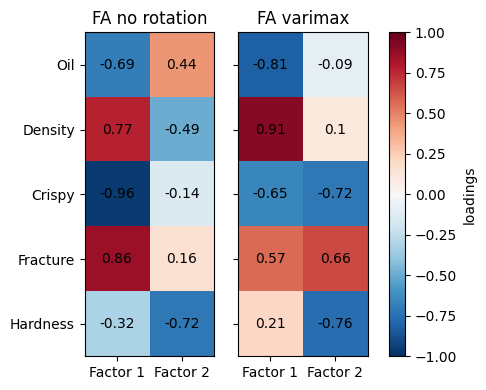

In [37]:
X = StandardScaler().fit_transform(food)  # Standardize the data
factors = 2
#  a list of 2 tuples containing titles for and instances of or class
fas = [
    ("FA no rotation", FactorAnalysis(n_components = factors)),
    ("FA varimax", FactorAnalysis(n_components = factors, rotation="varimax")),
]  

#  Let's prepare some plots on one canvas (subplots)
fig, axes = plt.subplots(ncols=len(fas), figsize=(5, 4))

'''
And loop over the variants of our analysis `fas`, zipped with the 
plot axes `axes`
'''
for ax, (title, fa) in zip(axes, fas):
    #  Fit the model to the standardized food data
    fa = fa.fit(X)

    #  and transpose the component (loading) matrix
    factor_matrix = fa.components_.T

    #  Plot the data as a heat map
    im = ax.imshow(factor_matrix, cmap="RdBu_r", vmax=1, vmin=-1)

    #  and add the corresponding value to the center of each cell
    for (i,j), z in np.ndenumerate(factor_matrix):
        ax.text(j, i, str(z.round(2)), ha="center", va="center")

    #  Tell matplotlib about the metadata of the plot
    ax.set_yticks(np.arange(len(food.columns)))
    if ax.get_subplotspec().is_first_col():
        ax.set_yticklabels(food.columns)
    else:
        ax.set_yticklabels([])
    ax.set_title(title)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Factor 1", "Factor 2"])

    #  and squeeze the axes tight, to save space
    plt.tight_layout()
    
#  and add a colorbar
cb = fig.colorbar(im, ax=axes, location='right', label="loadings")

#  show us the plot
plt.show()

#### Interpretation ☝️ 

**Factor Analysis** works by forming linear combinations of original variables to capture the shared variance among them — essentially identifying underlying latent factors. This process reduces the number of dimensions in the dataset while retaining most of the information (variance).

Factor Analysis often involves rotation to make the results more interpretable. The goal of rotation is to simplify the factor structure so that each variable loads strongly on one factor and weakly on others, making it easier to assign meaningful labels to the factors. 

As a result, it enables us to condense a large set of observed variables into fewer composite factors that represent broader, hidden constructs. This simplification makes it easier to understand and analyze complex datasets.

**The heatmap**<br>
- Loadings ranging from -1 to 1. The loadings indicate the contribution of each orginal variable to the factor. 
- Loadings close to +1 or -1 indicate strong relationships
- Loadings close to 0 indicate neglishible or weak relationships
- Color coding: red means positive loadings while blue are negative loadings
- The magnitude of the loading indicates the strength of the relationship, while the sign indicates its direction

**"No rotation" and "Varimax rotation"**<br>
Factor analysis often involves rotation to make the results more interpretable. No rotation leads to loadings harder to interpret because variables might have moderate loadings on multiple factors. Let's quickly move to the varimax rotation.

Varimax rotation maximizes the variance of loadings within each factor, making the structure clearer by pushing loadings toward either +1 or -1 and minimizing intermediate values.

**Observations**
- Varimax's Factor 1: Oil and Density seem to have an opposite loading on the same factor, meaning they are both important contributors but in opposing directions. 
- Varimax's Factor 2: Factor 2 appears to reflect textural properties , where higher values correspond to greater fracture resistance , while lower values are associated with increased crispiness and hardness.


<br>**<div class="alert alert-block alert-info">Important observation:** <br>Factor loadings don't indicate direct correlation between ariables, but how each variable relates to an underlying latent factor
</div>

## Uniqueness

Uniqueness is literally the opposite of the common factors: The proportion of a variable’s variance that is NOT explained by the common factors. So basically we have:
- Uniqueness = 1 − Communality .
- Communality is the proportion of a variable’s variance that is explained by the common factors.
- Therefore, Uniqueness is the remaining variance that is not explained by these factors.ç

**Ok all good till here, but how do we interpret uniquness?**
- A low uniqueness value indicates that most of the variable’s variance is explained by the common factors, suggesting the variable fits well into the factor structure.
- A high uniqueness value indicates that much of the variable’s variance is not explained by the common factors, suggesting the variable may not fit well with the other variables or might have unique characteristics.

<Axes: ylabel='Uniqueness'>

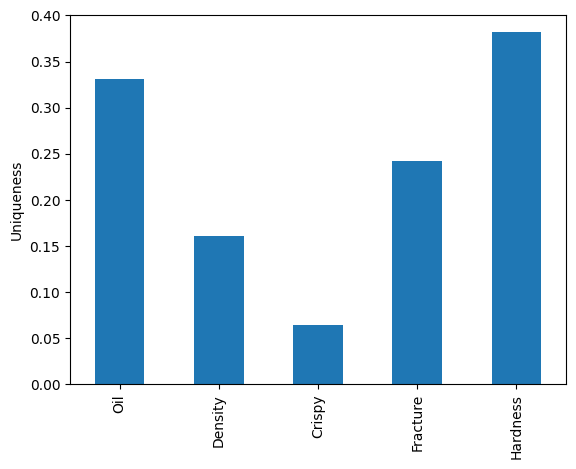

In [38]:
fa = FactorAnalysis(n_components = 2, rotation="varimax")
fa.fit(X)
uniqueness = pd.Series(fa.noise_variance_, index=food.columns)
uniqueness.plot(
    kind="bar",
    ylabel="Uniqueness"
)

#### Interpretation ☝️ 

- Oil has a high uniqueness (0.33). This means about 33% of Oliv's variance is NOT explained by the common factors. The same we could say about Hardness and we can apply the same logic to the rest of variables with its relative %s.
- Crispy has a very low uniqueness, meaning 93% of its variance its explanied by the common factors.
- This suggests that Crispy fits well into the factor structure and is strongly related to the underlying latent constructs captured by the analysis. At the same time it loads strongly on both Factors of the Varimax heatmap, so it's a reliable contributor.
- Hardness is strongly associated with Factor 2, although nearly 40% of its variance remains unexplained by the common factors

<br>**<div class="alert alert-block alert-info">Important observation:** <br>High uniqueness does not mean we should ignore the Factor Analysis results seen in the heatmap. However, it does suggest that some variables have a significant portion of variance not explained by the common factors , which means the overall factor model might explain less of the total variance. Therefore, interpretations and conclusions should reflect this uncertainty. 
</div>

## Communality

Communality is the proportion of a variable’s variance that is explained by the common factors. So basically we have:
- Communality = 1 − Uniqueness.
- The proportion of a variable's variance that is explained by the common factor
- Therefore, Uniqueness is the remaining variance that IS explained by these factors.

**Example**<br>
- If communality = 0.8 , then 80% of the variable’s variance is shared with other variables through the common factors.
- If uniqueness = 0.2 , then 20% of the variance is unique or unexplained.

<Axes: ylabel='communality'>

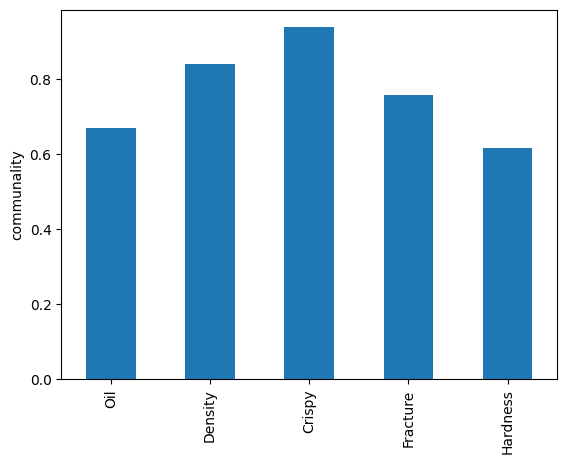

In [39]:
# Communality
communality = pd.Series(np.square(fa.components_.T).sum(axis=1), index=food.columns)
communality.plot(
    kind="bar",
    ylabel="communality"
)

#### Interpretation ☝️ 

- Communality values are all pretty high (all above 0.6), which says that ~60%s variance is explained by the Common Factors.
- Based on that, *Crispy communality factor is ~0.90, which implies that 90% of Crispy’s variance is explained by the common factors. 
- This indicates that the variables fit very well into the factor structure and is strongly related to the underlying latent constructs captured by the analysis. Which means we are in the good direction.
- Variables with lower communality (eg: *hardness*) suggest they might have unique characteristics or measurement issues that aren’t captured by the current factor model. We should interpret its role in the factor structure with caution and consider whether additional factors or alternative modeling approaches might better explain its variance.

All in all:
- Crispy and Density have high communality, indicating strong alignment with the latent factors.
- Fracture and Oil have moderate communality, suggesting reasonable but not perfect alignment.
- Hardness has low communality, indicating that much of its variance is not captured by the common factors.

## But wait... there is more!

In a previous exercise, I explored Principal Component Analysis (PCA) using a different dataset — the Wine dataset — for learning purposes.

[Check out the PCA notebook here](https://github.com/jrbayguade/DataTreatment_DimensionalityReduction_PCA/blob/PCA_Class/T7_1_PCA_Principal_Component_Analysis.ipynb)

It would be both insightful and constructive to apply the Factor Analysis process to the same dataset, no? So let's get through it! (a bit more quickly now)

In [40]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import FactorAnalysis # Factor Analysis sklearn's class
from sklearn.preprocessing import StandardScaler # We will need to standarize quantitative variables

wine = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
wine.sample(15)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
114,2,12.08,1.39,2.50,22.5,84,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385
83,2,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515
20,1,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840
165,3,13.73,4.36,2.26,22.5,88,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520
30,1,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
51,1,13.83,1.65,2.60,17.2,94,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265
12,1,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320
111,2,12.52,2.43,2.17,21.0,88,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325


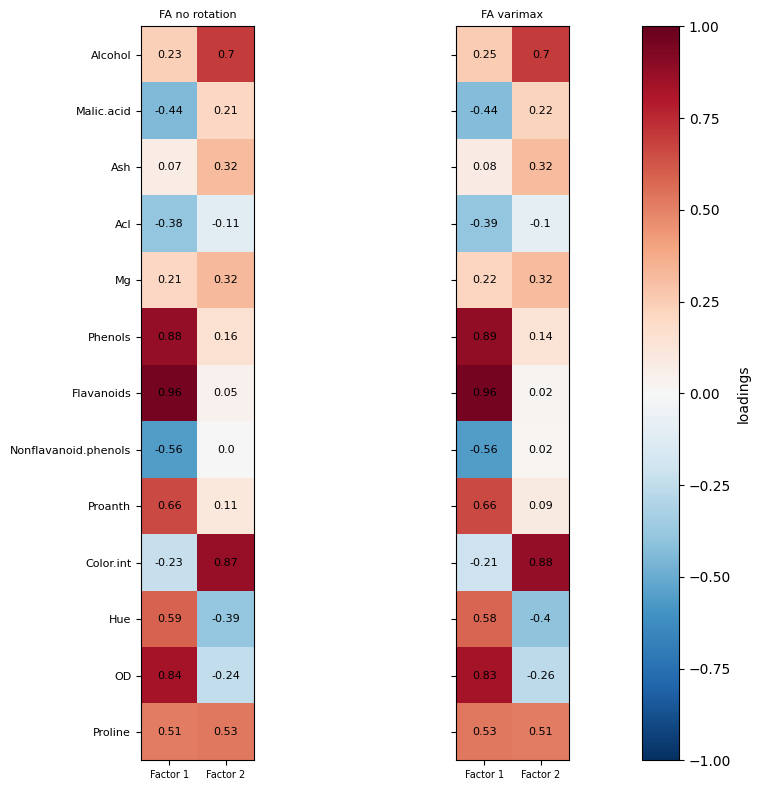

In [ ]:
reduced_wine = wine.drop('Wine', axis=1)  # IMPORTANT! drop the categorical column
X = StandardScaler().fit_transform(reduced_wine)  # Standardize the data
factors = 2
#  a list of 2 tuples containing titles for and instances of or class
fas = [
    ("FA no rotation", FactorAnalysis(n_components = factors)),
    ("FA varimax", FactorAnalysis(n_components = factors, rotation="varimax")),
]  

#  Let's prepare some plots on one canvas (subplots)
fig, axes = plt.subplots(ncols=len(fas), figsize=(15, 8))

'''
And loop over the variants of our analysis `fas`, zipped with the 
plot axes `axes`
'''
for ax, (title, fa) in zip(axes, fas):
    #  Fit the model to the standardized wine data
    fa = fa.fit(X)

    #  and transpose the component (loading) matrix
    factor_matrix = fa.components_.T

    #  Plot the data as a heat map
    im = ax.imshow(factor_matrix, cmap="RdBu_r", vmax=1, vmin=-1)

    #  and add the corresponding value to the center of each cell
    for (i,j), z in np.ndenumerate(factor_matrix):
        ax.text(j, i, str(z.round(2)), ha="center", va="center", fontsize=8)

    #  Tell matplotlib about the metadata of the plot
    ax.set_yticks(np.arange(len(reduced_wine.columns)))
    if ax.get_subplotspec().is_first_col():
        ax.set_yticklabels(reduced_wine.columns, fontsize=8)
    else:
        ax.set_yticklabels([])
    ax.set_title(title, fontsize=8)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Factor 1", "Factor 2"], fontsize=7)
    
    #  and squeeze the axes tight, to save space
    plt.tight_layout()
    
#  and add a colorbar
cb = fig.colorbar(im, ax=axes, location='right', label="loadings")

#  show us the plot
plt.show()

<Axes: ylabel='Uniqueness'>

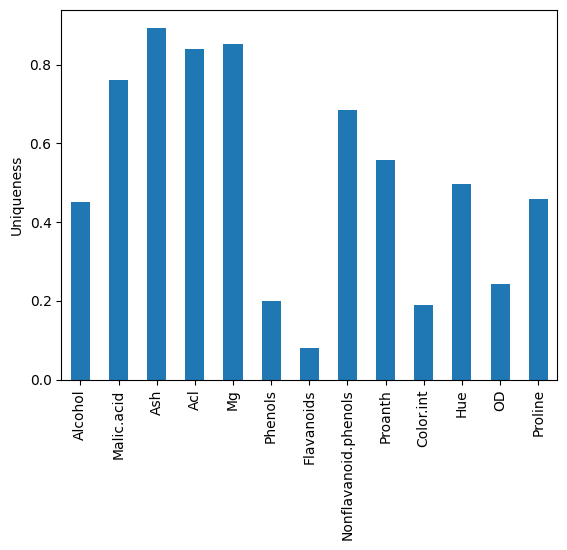

In [44]:
fa = FactorAnalysis(n_components = 2, rotation="varimax")
fa.fit(X)
uniqueness = pd.Series(fa.noise_variance_, index=reduced_wine.columns)
uniqueness.plot(
    kind="bar",
    ylabel="Uniqueness"
)

<Axes: ylabel='communality'>

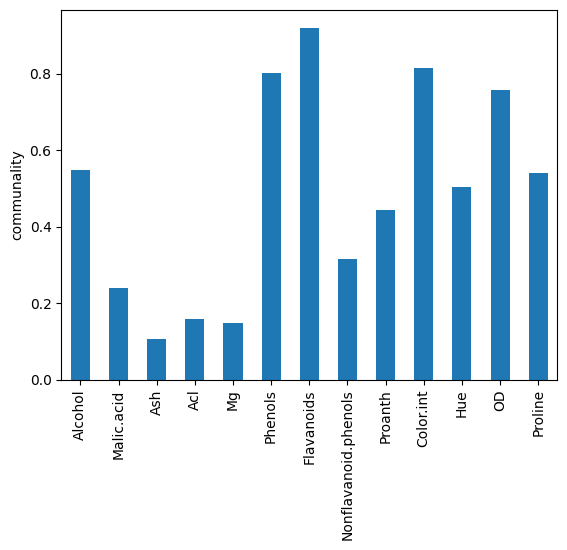

In [45]:
# Communality
communality = pd.Series(np.square(fa.components_.T).sum(axis=1), index=reduced_wine.columns)
communality.plot(
    kind="bar",
    ylabel="communality"
)